## Regression Main Lab

The aim of this lab is to apply the methods and tricks you have learned to improve the quality of the fit. A bare-bones fit using a linear regression on the input features has been included as a starting point.

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Load the data

We will use the Ames housing dataset from http://ww2.amstat.org/publications/jse/v19n3/decock.pdf.

In [2]:
data = pd.read_csv('AmesHousing.txt', delimiter='\t')
numeric_values = np.where(
    (data.dtypes == np.dtype('int64'))
    | (data.dtypes == np.dtype('float64'))
)[0]
X = data[numeric_values[2:-1]].values
y = data['SalePrice'].values
feature_names = data.columns[numeric_values[2:-1]]

In [3]:
numeric_values

array([ 0,  1,  2,  4,  5, 18, 19, 20, 21, 27, 35, 37, 38, 39, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 55, 57, 60, 62, 63, 67, 68, 69, 70, 71,
       72, 76, 77, 78, 81])

In [4]:
from sklearn.model_selection import train_test_split

X = np.nan_to_num(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Inspect the data

Let's take a quick look at the distribution of variables, looking for potential sources of outliers or features that may reduce the performance of our model.

We'll use whisker plots to visualize all of the features at once. The organge line is the median value, the edges of the box denote the 1st and 3rd quartile, the bars at the end denote the maxium and minimum values, and individual points within the top and bottom quartile.

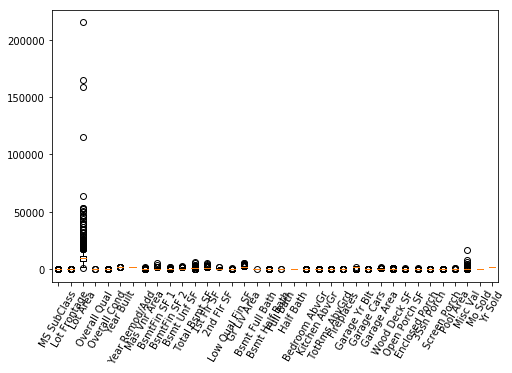

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(X_train)
ax.set_xticks(range(1, X_train.shape[1] + 1))
_ = ax.set_xticklabels(feature_names, rotation=60)

## Train a model



Model Coefficients
MS SubClass: -144.08
Lot Frontage: 28.72
  Lot Area: 0.42
Overall Qual: 17302.76
Overall Cond: 4747.37
Year Built: 356.49
Year Remod/Add: 192.92
Mas Vnr Area: 31.40
BsmtFin SF 1: 10.58
BsmtFin SF 2: -0.03
Bsmt Unf SF: -2.45
Total Bsmt SF: 8.10
1st Flr SF: 20.93
2nd Flr SF: 15.17
Low Qual Fin SF: -7.54
Gr Liv Area: 28.55
Bsmt Full Bath: 7113.44
Bsmt Half Bath: -1456.04
 Full Bath: 2442.65
 Half Bath: -879.26
Bedroom AbvGr: -7776.34
Kitchen AbvGr: -15517.58
TotRms AbvGrd: 4247.75
Fireplaces: 4987.76
Garage Yr Blt: -13.07
Garage Cars: 8568.00
Garage Area: 27.82
Wood Deck SF: 15.22
Open Porch SF: -0.92
Enclosed Porch: 21.42
3Ssn Porch: 7.72
Screen Porch: 60.32
 Pool Area: -128.30
  Misc Val: -15.86
   Mo Sold: 74.88
   Yr Sold: -839.65

Fit R^2 = 0.84, prediction MSE = 1355263106.85760


/Users/eman/tensorflow/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


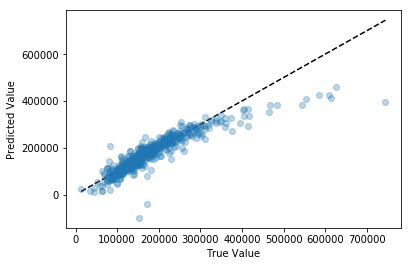

In [6]:
clf = LinearRegression()
clf.fit(X_train, y_train)
fit_r2 = clf.score(X_train, y_train)
y_pred = clf.predict(X_test)
mse_pred = mean_squared_error(y_test, y_pred)

fig, ax = plt.subplots()
y_min = np.min(y_test)
y_max = np.max(y_test)
ax.plot([y_min, y_max], [y_min, y_max], 'k--')
ax.plot(y_test, y_pred, 'o', alpha=0.3)
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')

print('Model Coefficients')
for fn, coef in zip(feature_names, clf.coef_):
    print('%10s: %.2f' % (fn, coef))
print('\nFit R^2 = %.2f, prediction MSE = %.5f' % (fit_r2, mse_pred))

## Open Questions

* Which features have the most predictive power?
* Should any of the features be pre-processed?
  * How could we include the non-numeric features?
* Can we improve the model by including higher-order terms?
* Do we risk over-fitting this data?